In [1]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

# Create a Client to Connect to Tiingo
client = TiingoClient()

# Create Start and End Dates for the Last 30 Days
end = datetime.now()
start = end + timedelta(-30)

In [2]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
china_df = china_ticker_df.rename(columns={'CQQQ':'CQQQ (Technology)', 'CHIE':'CHIE (Energy)', 'CHIM':'CHIM (Materials)', 'KURE':'KURE (Healthcare)', 'CHIS':'CHIS (Consumer Staples)'})
china_df.head()

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


,ASHR,CQQQ (Technology),CHIE (Energy),CHIM (Materials),KURE (Healthcare),CHIS (Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,30.27,56.55,10.9779,17.225,23.8500,22.39
2020-01-10 00:00:00+00:00,30.27,57.04,11.0100,17.065,23.8330,22.40
2020-01-13 00:00:00+00:00,30.88,58.93,11.0150,17.260,24.4151,22.75
2020-01-14 00:00:00+00:00,30.64,57.74,10.9050,17.430,24.1469,22.58
2020-01-15 00:00:00+00:00,30.41,57.94,10.9250,17.285,24.1896,22.62


In [3]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

#china_df.dropna(inplace=True)
#china_df.isnull().sum()

ASHR                       0
CQQQ (Technology)          0
CHIE (Energy)              0
CHIM (Materials)           0
KURE (Healthcare)          0
CHIS (Consumer Staples)    0
dtype: int64

In [4]:
# Calculate the Daily Returns for China Stocks
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

,ASHR,CQQQ (Technology),CHIE (Energy),CHIM (Materials),KURE (Healthcare),CHIS (Consumer Staples)
date,,,,,,
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,0.000000,0.008665,0.002924,-0.009289,-0.000713,0.000447
2020-01-13 00:00:00+00:00,0.020152,0.033135,0.000454,0.011427,0.024424,0.015625
2020-01-14 00:00:00+00:00,-0.007772,-0.020193,-0.009986,0.009849,-0.010985,-0.007473
2020-01-15 00:00:00+00:00,-0.007507,0.003464,0.001834,-0.008319,0.001768,0.001771


In [5]:
# Calculate the Value of Average Daily Returns
##avg_daily_returns_ashr = china_daily_returns.mean()['ASHR']
avg_daily_returns_cqqq = china_daily_returns.mean()['CQQQ (Technology)']
avg_daily_returns_chie = china_daily_returns.mean()['CHIE (Energy)']
avg_daily_returns_chim = china_daily_returns.mean()['CHIM (Materials)']
avg_daily_returns_kure = china_daily_returns.mean()['KURE (Healthcare)']
avg_daily_returns_chis = china_daily_returns.mean()['CHIS (Consumer Staples)']

# Calculate the Standard Deviation 
##std_daily_returns_ashr = china_daily_returns.std()['ASHR']
std_daily_returns_cqqq = china_daily_returns.std()['CQQQ (Technology)']
std_daily_returns_chie = china_daily_returns.std()['CHIE (Energy)']
std_daily_returns_chim = china_daily_returns.std()['CHIM (Materials)']
std_daily_returns_kure = china_daily_returns.std()['KURE (Healthcare)']
std_daily_returns_chis = china_daily_returns.std()['CHIS (Consumer Staples)']

# Save the Last Day's Closing Price
##ashr_last_price = china_df['ASHR'][-1]
cqqq_last_price = china_df['CQQQ (Technology)'][-1]
chie_last_price = china_df['CHIE (Energy)'][-1]
chim_last_price = china_df['CHIM (Materials)'][-1]
kure_last_price = china_df['KURE (Healthcare)'][-1]
chis_last_price = china_df['CHIS (Consumer Staples)'][-1]

In [6]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [7]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    ##simulated_ashr_prices = [ashr_last_price]
    simulated_cqqq_prices = [cqqq_last_price]
    simulated_chie_prices = [chie_last_price]
    simulated_chim_prices = [chim_last_price]
    simulated_kure_prices = [kure_last_price]
    simulated_chis_prices = [chis_last_price]
    
    for y in range (number_records):
        ##simulated_ashr_price = simulated_ashr_prices[-1] * (1 + np.random.normal(avg_daily_returns_ashr, std_daily_returns_ashr))
        simulated_cqqq_price = simulated_cqqq_prices[-1] * (1 + np.random.normal(avg_daily_returns_cqqq, std_daily_returns_cqqq))
        simulated_chie_price = simulated_chie_prices[-1] * (1 + np.random.normal(avg_daily_returns_chie, std_daily_returns_chie))
        simulated_chim_price = simulated_chim_prices[-1] * (1 + np.random.normal(avg_daily_returns_chim, std_daily_returns_chim))
        simulated_kure_price = simulated_kure_prices[-1] * (1 + np.random.normal(avg_daily_returns_kure, std_daily_returns_kure))
        simulated_chis_price = simulated_chis_prices[-1] * (1 + np.random.normal(avg_daily_returns_chis, std_daily_returns_chis))
       
        ##simulated_ashr_prices.append(simulated_ashr_price)
        simulated_cqqq_prices.append(simulated_cqqq_price)
        simulated_chie_prices.append(simulated_chie_price)
        simulated_chim_prices.append(simulated_chim_price)
        simulated_kure_prices.append(simulated_kure_price)
        simulated_chis_prices.append(simulated_chis_price)
    
    ##monte_carlo['ASHR prices'] = pd.Series(simulated_ashr_prices)
    monte_carlo['CQQQ (Technology) prices'] = pd.Series(simulated_cqqq_prices)
    monte_carlo['CHIE (Energy) prices'] = pd.Series(simulated_chie_prices)
    monte_carlo['CHIM (Materials) prices'] = pd.Series(simulated_chim_prices)
    monte_carlo['KURE (Healthcare) prices'] = pd.Series(simulated_kure_prices)
    monte_carlo['CHIS (Consumer Staples) prices'] = pd.Series(simulated_chis_prices)
    
    simulated_china_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    china_portfolio_daily_returns = simulated_china_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + china_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.002098,0.002065,-0.005066,-0.002609,0.006653,-0.000256,0.007030,-0.000621,0.013718,-0.016853,...,0.000032,-0.009963,-0.007567,-0.008303,-0.004310,-0.003299,-0.006465,0.022322,-0.012609,-0.015461
2,-0.018563,-0.002350,-0.017132,0.022350,0.001365,0.003367,-0.015380,-0.017374,0.003112,-0.026730,...,0.003242,-0.026567,-0.028599,-0.002702,0.008319,-0.011769,-0.006798,0.023706,0.007558,-0.024360
3,-0.019921,0.000179,-0.015551,0.032838,-0.007712,-0.009388,-0.012989,-0.028943,0.012872,-0.021193,...,-0.010099,-0.024680,-0.045148,-0.029556,0.015228,-0.031927,-0.003765,0.004890,0.000014,-0.029778
4,-0.021834,0.005840,-0.023722,0.044240,-0.027283,-0.012726,-0.007635,-0.026756,-0.012835,-0.013887,...,-0.013646,-0.023978,-0.037831,-0.036706,0.009703,-0.052868,0.002156,-0.005352,-0.011898,-0.035000


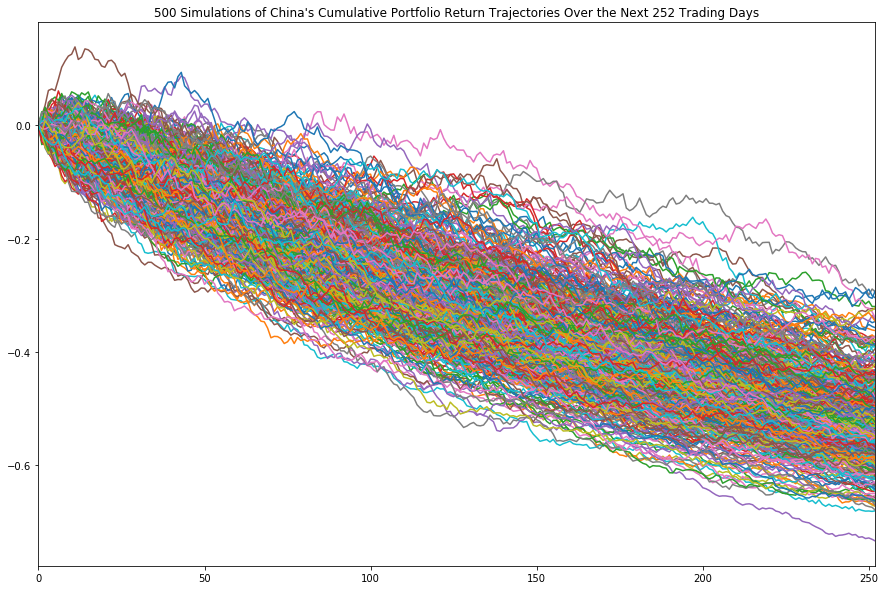

In [8]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of China's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))